In [ ]:
#%%

#
# Source : https://x.com/QuantINsider_IQ/status/1806254560065069167
#
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt

In [ ]:
#%%

# Transaction costs includes
# - fixed components    : commissions and fees
# - variable components : slippage and market impact
#
# There are 4 basic types of transaction costs
# - Flat Transaction Cost Model
# - Linear Transaction Cost Model
# - Piecewise-Linear Transaction Cost Model
# - Quadratic Transaction Cost Model
#
# Each model has different assumptions and complexities
#
#

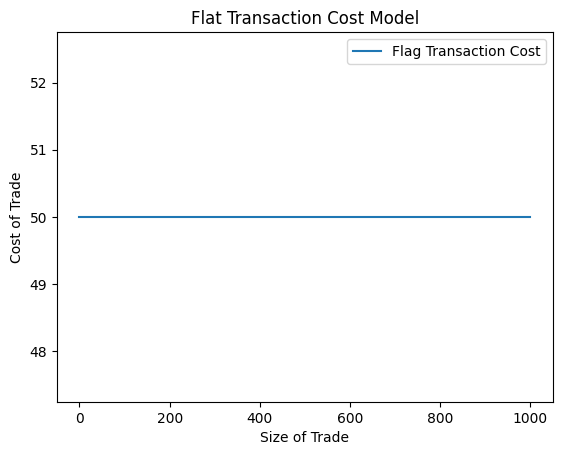

In [ ]:
#%%

#
# Flat Transaction Cost Model
#
#   It is the simplest type, assuming a constant cost per trade, regardless of trade size.
#
#   C(x) = C_0
# 
#   - C(x) is the transactoin cost
#   - C_0  is the fixed cost per trade
#
#   This model doesn't account for the variable nature of transaction cost 
#   such as slippage or market impact.
#

# Trade sizes
x      = np.linspace(0, 1000, 100)
# Flat transaction cost
c0     = 50
c_flat = np.full_like(x, c0)

plt.plot(x, c_flat, label='Flag Transaction Cost')
plt.xlabel('Size of Trade')
plt.ylabel('Cost of Trade')
plt.title('Flat Transaction Cost Model')
plt.legend()
plt.show()

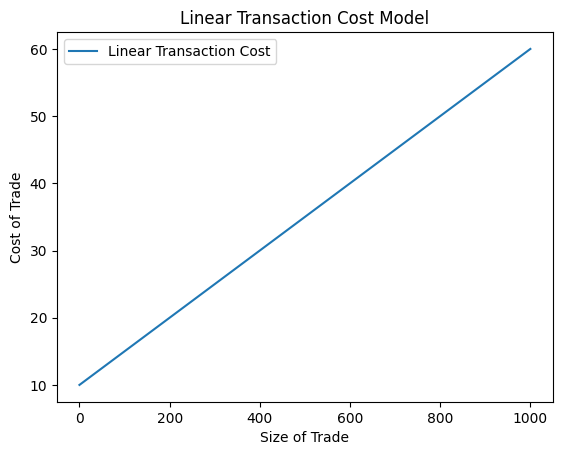

In [ ]:
#%%

# 
# Linear Transaction Cost Model
#
#   Assumes that transaction costs increase linearly with the size of the trade.
#   This model is more realistic than the flat model as it captures the proportional
#   relationship between trade size and transaction cost.
#
#   C(x) = a*x + b
#
#   C(x) is the transaction cost
#   x    is the trade size
#   a    is the variable cost per unit trade size
#   b    is the fixed cost component
#
#   This model is useful for scenarios where costs such as slippage or brokerage
#   fees increase proportionally with the trade sie.
#

a        = 0.05
b        = 10
c_linear = a*x +b

plt.plot(x, c_linear, label='Linear Transaction Cost')
plt.xlabel('Size of Trade')
plt.ylabel('Cost of Trade')
plt.title('Linear Transaction Cost Model')
plt.legend()
plt.show()

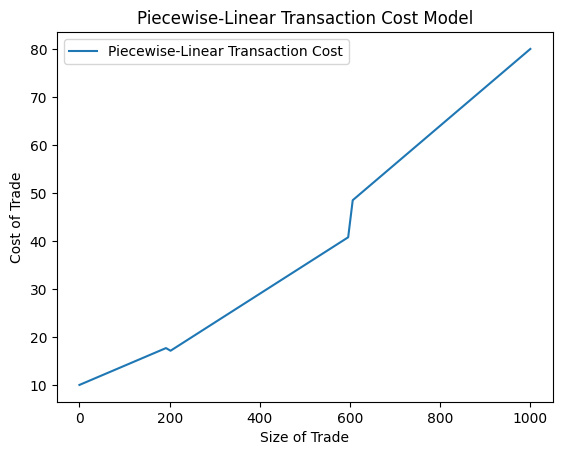

In [ ]:
#%%

#
# Piecewise-Linear Transaction Cost Model
#
#   This model uses multiple linear segments to approximate the true transaction cost
#   more accurately. This model is particularly useful when the cost structure changes 
#   at different trade size thresholds.
#
#   a_1*x + b_1    if  x <= x_1
#   a_2*x + b_2    if  x_1 < x <= x_2
#   ...
#   a_n*x + b_n    if  x > x_{n-1}
#  

def piecewise_linear(x):
    if x <= 200:
        return 0.04*x+10
    elif x<=600:
        return 0.06*x+5
    else:
        return 0.08*x

c_piecewise = np.piecewise(
    x, 
    [
        x <= 200,
        (x>200) & (x<=600),
        x>600
    ],
    [
        lambda x: 0.04*x + 10,
        lambda x: 0.06*x + 5 ,
        lambda x: 0.08*x
    ]
)

plt.plot(x, c_piecewise, label='Piecewise-Linear Transaction Cost')
plt.xlabel('Size of Trade')
plt.ylabel('Cost of Trade')
plt.title('Piecewise-Linear Transaction Cost Model')
plt.legend()
plt.show()

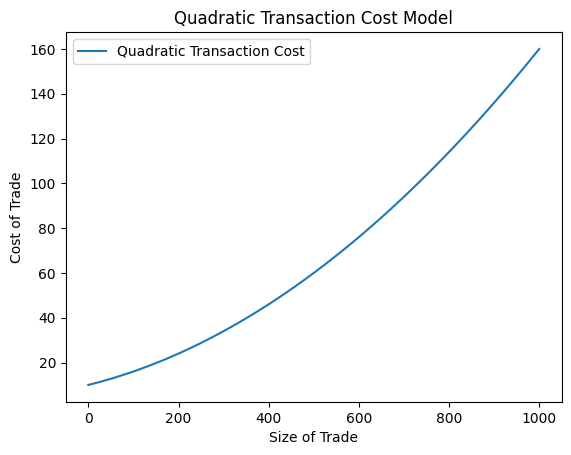

In [ ]:
#%%

# 
# Quadratic Transaction Cost Model
#
#   It assumes that transaction cost increase quadratically with the trade size.
#   This model captures the non-linear relationship between trade size and
#   transaction costs, particularly the market impact
#
#   C(x) = a*x^2 + b*x + c
#
#   C(x)    is the transaction cost
#   x       is the trade size
#   a, b c  are constants
#

a = 0.0001
b = 0.05
c = 10
c_quadratic = a * x**2 + b*x +c
plt.plot(x, c_quadratic, label='Quadratic Transaction Cost')
plt.xlabel('Size of Trade')
plt.ylabel('Cost of Trade')
plt.title('Quadratic Transaction Cost Model')
plt.legend()
plt.show()

<Axes: >

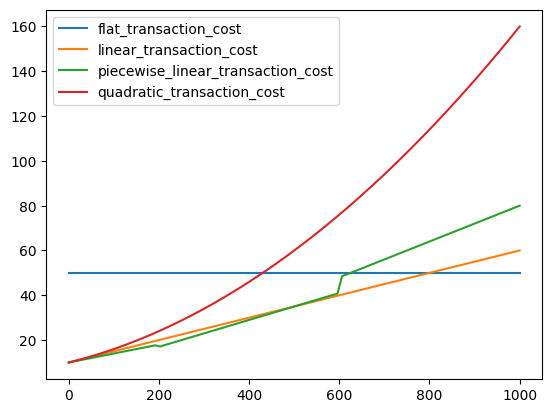

In [ ]:
#%%

#
# According to this tweet, Quadratic Transaction Cost can be more 
# approximated model
#
df = pd.DataFrame(index=x)
df['flat_transaction_cost'            ] = c_flat
df['linear_transaction_cost'          ] = c_linear
df['piecewise_linear_transaction_cost'] = c_piecewise
df['quadratic_transaction_cost'       ] = c_quadratic

df.plot()